# Predictive Modeling for Malignant Breast Cancer Diagnosis
## By: Roger Qiu, March 2024

### Introduction:

This project aims to use machine learning techniques to diagnose breast cancer, specifically distinguishing between benign and malignant cases. The data used is derived from digitized images of a fine needle aspirate (FNA) of a breast mass, with features describing characteristics of the cell nuclei present in the image. The importance of this work lies in its potential to aid in early and accurate diagnosis, thereby improving patient outcomes.

The process begins with an in-depth Exploratory Data Analysis (EDA), followed by data pre-processing to prepare the data for machine learning models. A variety of models, including Logistic Regression, Decision Tree, Random Forest, K-Nearest Neighbors, and XGBoost, are trained and tested. Hyperparameter tuning is used to optimize these models, and feature selection techniques such as univariate feature selection, recursive feature elimation with cross validation (RFECV) and principal component analysis (PCA) are used to identify the most relevant features.

Data can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

## EDA

In [77]:
# import libraries
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler, Normalizer
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from collections import Counter
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
import random
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
import warnings
# ignore all warnings
warnings.filterwarnings('ignore')

In [2]:
# show all columns
pd.set_option('display.max_columns', None)

data = pd.read_csv('/data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# 33 fields, 569 records
print(data.shape)

(569, 33)


Field info:

1) ID number
2) Diagnosis (M = malignant, B = benign)

Fields 3-32:

    a) radius (mean of distances from center to points on the perimeter)
    b) texture (standard deviation of gray-scale values)
    c) perimeter
    d) area
    e) smoothness (local variation in radius lengths)
    f) compactness (perimeter^2 / area - 1.0)
    g) concavity (severity of concave portions of the contour)
    h) concave points (number of concave portions of the contour)
    i) symmetry
    j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Class distribution: 357 benign, 212 malignant

In [4]:
# check nulls

# count the null values in each field, print where more than 0 nulls
null_counts = data.isnull().sum()
print(null_counts[null_counts > 0])

Unnamed: 32    569
dtype: int64


In [5]:
# set labels a y
y = data.diagnosis
y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [6]:
# drop the last null field, the id field (no useful info here), and the label field field from features
list = ['Unnamed: 32','id','diagnosis']
x = data.drop(list,axis = 1 )
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Visualizations

Number of Benign:  357
Number of Malignant :  212


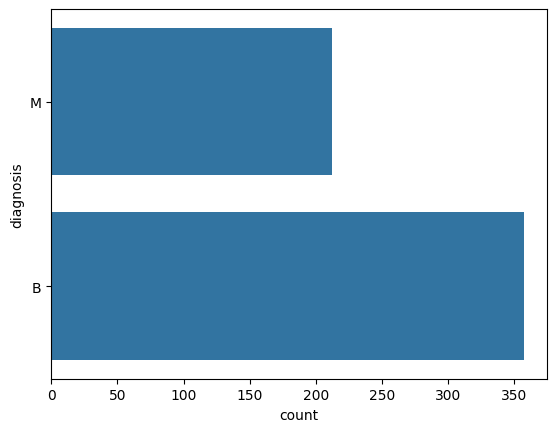

In [7]:
# barchart of diagnosis
ax = sns.countplot(y,label="Count")

B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

In [8]:
# visualize the mean features using violin charts
data_dia = y
data = x

# standardize all values: subtract the mean of each field from each element then divide by the standard dev.
data_n_2 = (data - data.mean()) / (data.std())
data_n_2

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,2.487545,-0.564768,2.830540,2.485391,-0.213814,1.315704,0.723390,0.660239,1.147747,0.906286,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,0.498816,-0.875473,0.263095,0.741749,-0.604819,-0.692317,-0.440393,0.259933,-0.804742,-0.099356,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,1.227596,-0.779398,0.850180,1.180298,-0.296744,0.814257,0.212889,1.423575,0.236827,0.293301,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,0.326087,-0.110312,0.286341,-0.288125,0.689095,2.741868,0.818798,1.114027,4.728520,2.045711,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,1.269426,-0.789549,1.272070,1.189310,1.481763,-0.048477,0.827742,1.143199,-0.360775,0.498889,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,-0.312314,-0.930209,2.779634,0.070963,2.377491,2.601897,1.085429,0.191637,0.665416,2.065360,-1.137415,0.167832,1.899514,0.117596,1.751022,2.013529,0.378033,-0.273077,0.663928,1.627719,-1.358963,-0.708467
565,1.703356,2.083301,1.614511,1.722326,0.102368,-0.017817,0.692434,1.262558,-0.217473,-1.057681,1.299356,2.258951,1.155840,1.290429,-0.423637,-0.069697,0.251980,0.807720,-0.188995,-0.490124,1.535369,2.045599,1.420690,1.493644,-0.690623,-0.394473,0.236365,0.733182,-0.531387,-0.973122
566,0.701667,2.043775,0.672084,0.577445,-0.839745,-0.038646,0.046547,0.105684,-0.808406,-0.894800,0.184730,-0.257145,0.276450,0.180539,-0.379008,0.660696,0.510377,0.611619,-0.890632,0.036694,0.560868,1.373645,0.578492,0.427529,-0.808876,0.350427,0.326479,0.413705,-1.103578,-0.318129
567,1.836725,2.334403,1.980781,1.733693,1.524426,3.269267,3.294046,2.656528,2.135315,1.042778,1.156917,0.685485,1.437265,1.008615,-0.172848,2.015943,1.301140,0.785031,0.326346,0.903262,1.959515,2.235958,2.301575,1.651717,1.429169,3.901415,3.194794,2.287972,1.917396,2.217684


In [9]:
# concat the labels with the first 10 "mean" columns
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764
1,M,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889
2,M,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658
3,M,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602
4,M,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956
...,...,...,...,...,...,...,...,...,...,...,...
564,M,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,-0.312314,-0.930209
565,M,1.703356,2.083301,1.614511,1.722326,0.102368,-0.017817,0.692434,1.262558,-0.217473,-1.057681
566,M,0.701667,2.043775,0.672084,0.577445,-0.839745,-0.038646,0.046547,0.105684,-0.808406,-0.894800
567,M,1.836725,2.334403,1.980781,1.733693,1.524426,3.269267,3.294046,2.656528,2.135315,1.042778


In [10]:
# use melt method to reshape the df above vertically to just 3 fields, the label, feature and value
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
data
# new df has 5689 rows (569 original rows * 10 features)

,diagnosis,features,value
0,M,radius_mean,1.096100
1,M,radius_mean,1.828212
2,M,radius_mean,1.578499
3,M,radius_mean,-0.768233
4,M,radius_mean,1.748758
...,...,...,...
5685,M,fractal_dimension_mean,-0.930209
5686,M,fractal_dimension_mean,-1.057681
5687,M,fractal_dimension_mean,-0.894800
5688,M,fractal_dimension_mean,1.042778


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

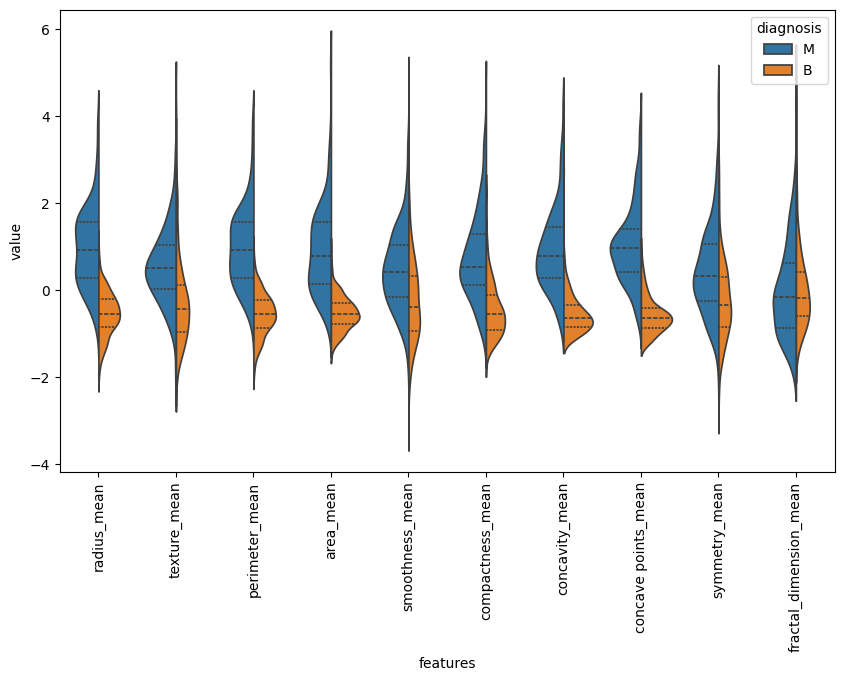

In [11]:
# create violin plots based on the 'mean' features and standardized values.
# split set to true for easier comparisons between malignant and benign
plt.figure(figsize=(10,6))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

This plot gives us an idea of have the values are distributed for each feature by class. For example, in texture_mean feature, we can clearly see that the median (middle horizontal dotted line) of the malignant is much higher than that of the benign so this feature can most likely be used for classification. But, in fractal_dimension_mean feature, distribution of the malignant and benign does not appear to be very different so it likely will not gives good information for classification.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

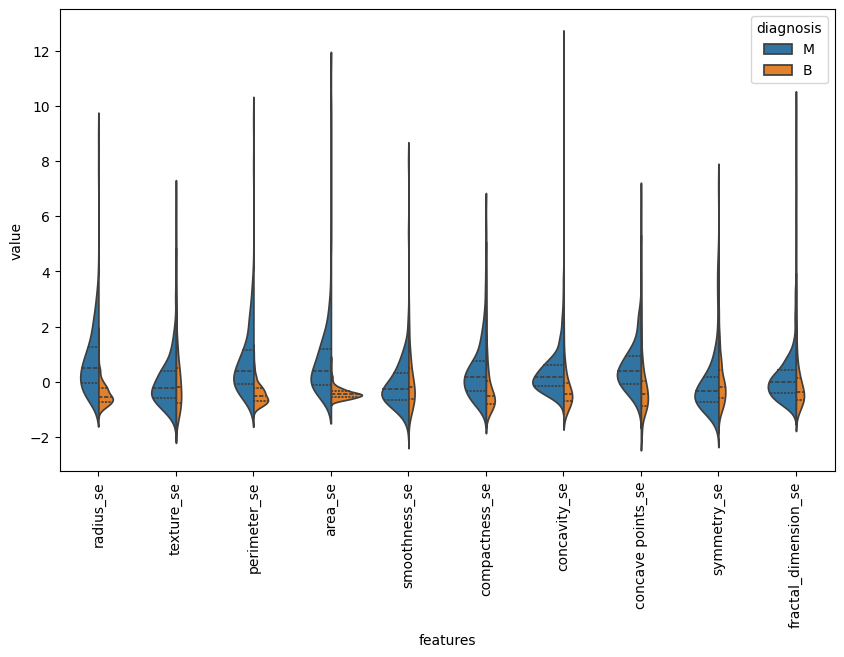

In [12]:
# lets do the same for the next 10 features, the standard errors
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,6))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

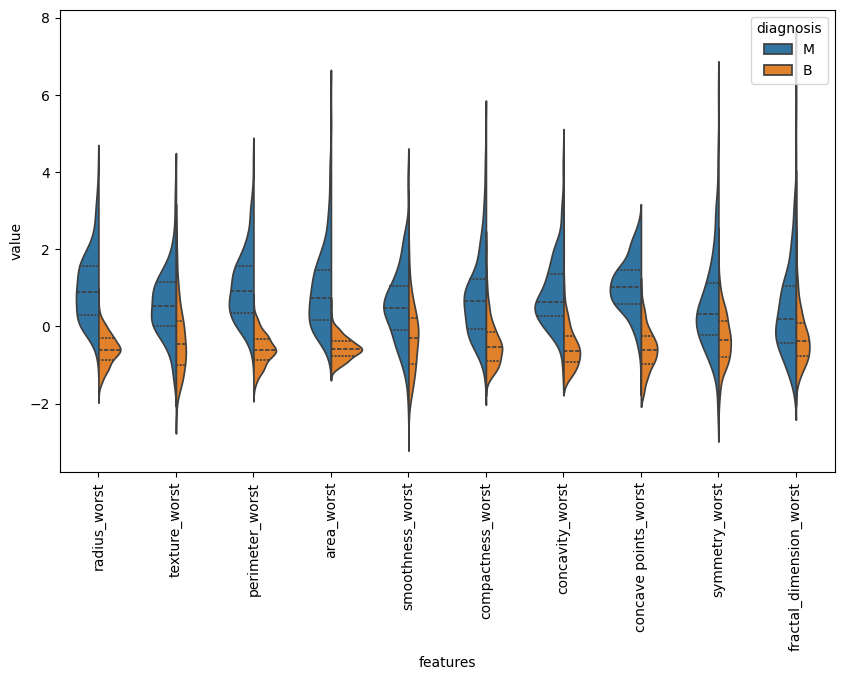

In [13]:
# and the final 10 features, the worst
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,6))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

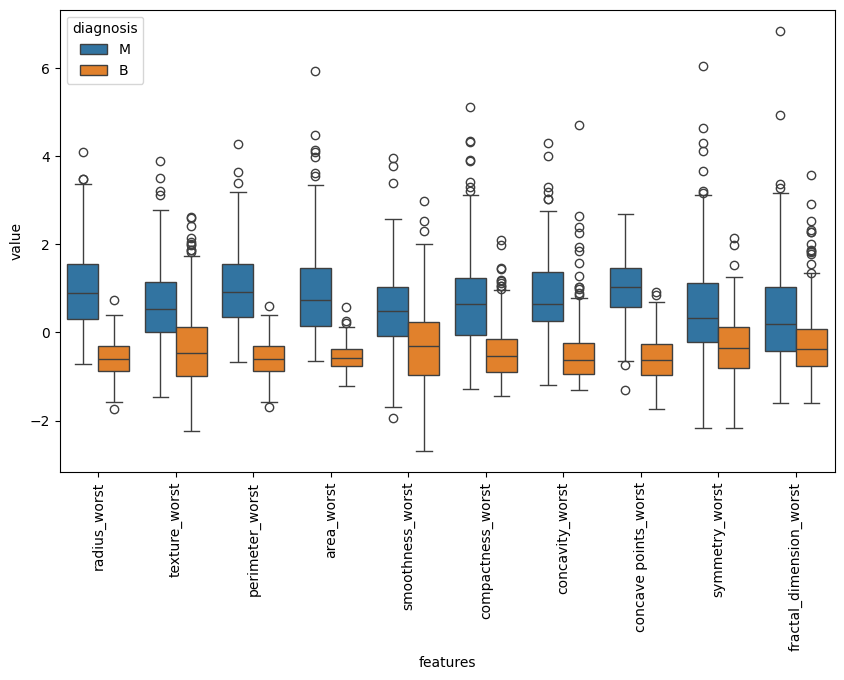

In [14]:
# Using boxplots can also allow us to see how the outliers differ by class
plt.figure(figsize=(10,6))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

With boxplots, we can see that malignant classes have much more greater value outliers than benign.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

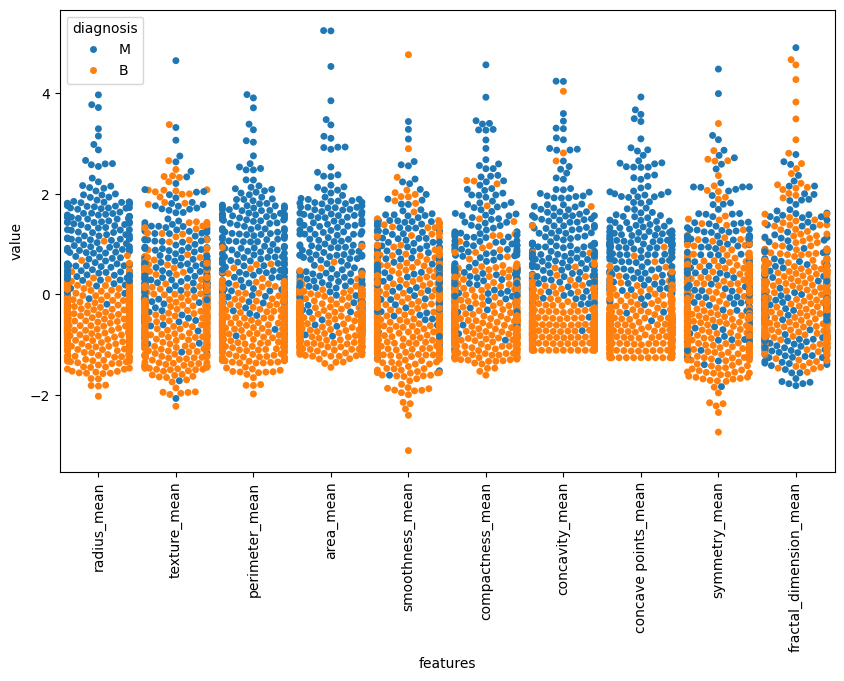

In [15]:
# another interesting visualization to use is the swarm plot, helps us to easily visualize distribution of values for features between classes.
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,6))

sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

<Axes: >

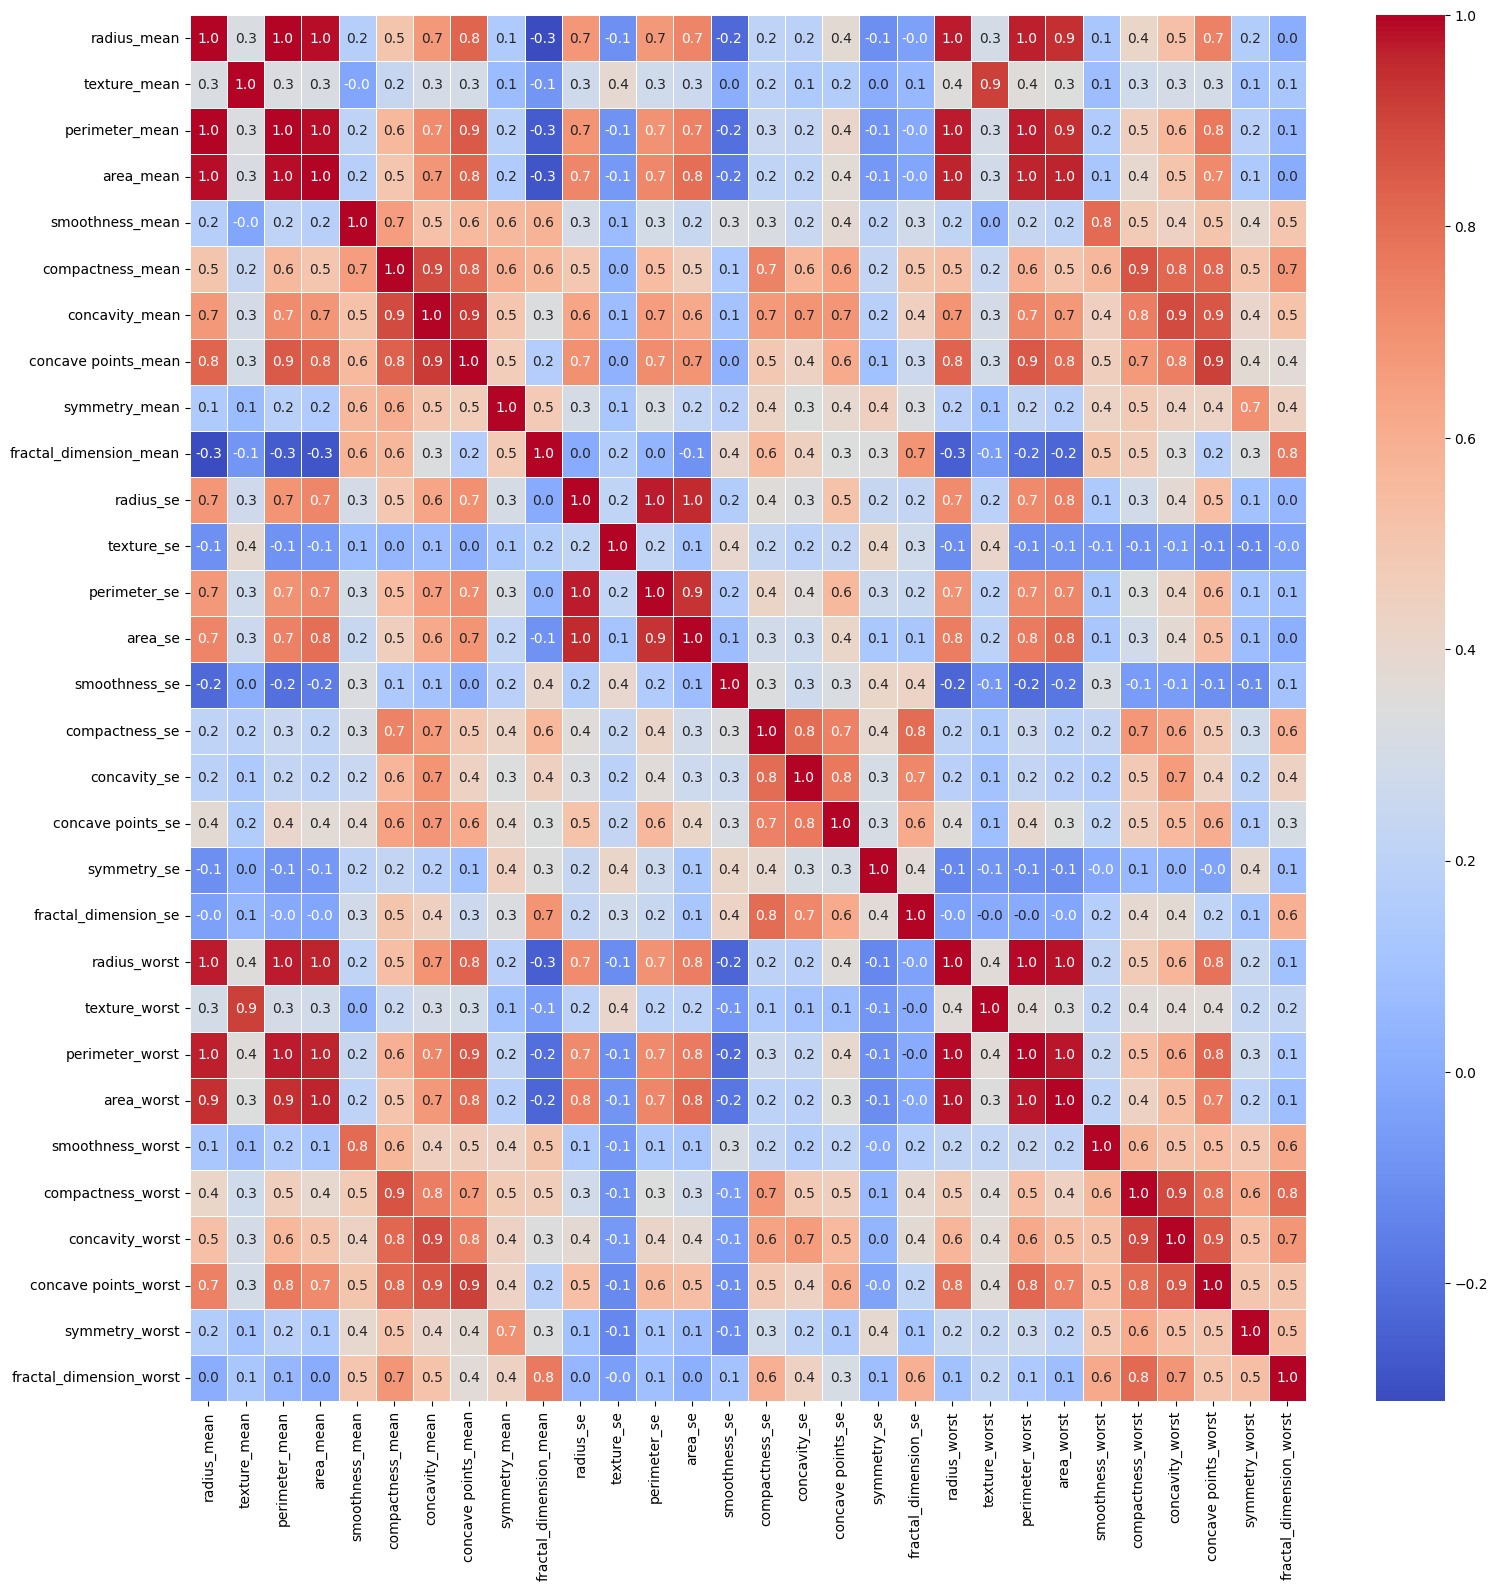

In [16]:
# finally, a correlation map to see correlations between all 30 features
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap='coolwarm')

## Data pre-processing

Since there only 569 records, will be better off using 5 fold cross-validation (CV), rather than a 70/30 split. Cross validation allows training and testing models on multiple subsets of the data, which can allow better estimates of model performance.

Need to create a scaled version of features for Logistic Regression and KNN. These 2 models create more accurate predictions when features are on the same scale.

Also will need to encode your labels into numerical values of 0 and 1 before using it with classification metrics

In [17]:
# check features
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [18]:
# check labels
y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [19]:
# check distribution
y.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [20]:
# scale the features using standard scaler
scaler = StandardScaler()

# scale all the features
X_scaled = scaler.fit_transform(x)

# check new values
X_scaled[:1]

array([[ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633,
         3.28351467,  2.65287398,  2.53247522,  2.21751501,  2.25574689,
         2.48973393, -0.56526506,  2.83303087,  2.48757756, -0.21400165,
         1.31686157,  0.72402616,  0.66081994,  1.14875667,  0.90708308,
         1.88668963, -1.35929347,  2.30360062,  2.00123749,  1.30768627,
         2.61666502,  2.10952635,  2.29607613,  2.75062224,  1.93701461]])

In [21]:
# original values
x[:1]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


In [22]:
# encoder for labels
label_encoder = LabelEncoder()

# encode the labels
y_encoded = label_encoder.fit_transform(y)

# check the distribution of prediction results
pandas_series = pd.Series(y_encoded)
print(pandas_series.value_counts())

# 0 for benign, 1 for malignant

0    357
1    212
dtype: int64


## Models with no feature selection

#### Logistic Regression

In [23]:
# create a logistic regression model
model = LogisticRegression()

# perform cross-validation predictions
log_predictions = cross_val_predict(model, X_scaled, y_encoded, cv=5)

# check the distribution of prediction results
predictions_series = pd.Series(log_predictions)
print(predictions_series.value_counts())

0    362
1    207
dtype: int64


In [24]:
# classification Report
print("Classification Report:")
print(classification_report(y_encoded, log_predictions))

# ROC AUC Score
roc_auc = roc_auc_score(y_encoded, log_predictions)
print("ROC AUC Score:", roc_auc)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       357
           1       0.99      0.96      0.97       212

    accuracy                           0.98       569
   macro avg       0.98      0.98      0.98       569
weighted avg       0.98      0.98      0.98       569

ROC AUC Score: 0.9769303947994292


Precision is true positive instances divided by the total number of positive predictions. So a precision of .98 means that 98% of the instances predicted as positive by the model were indeed positive. This is the proportion of patients, predicted to have malignant cancer who actually have it.

Recall or sensitivity is the correctly predicted positive instances to all actual positive labels. A recall of 0.98 means that the model correctly found 98% of all patients with malignant cancer. So out of all the people with malignant cancer, the model found 98% of them.

Accuracy is .96 which is the ratio of correct predictions to total predictions.

AUC scores are better to get an understanding of the models trade off between true positives (recall) and false positives (1 - specificity) at each threshold (when an instance would be classified as positive or negative).

Our AUC of .977 tells us it is a good classifier in distinguishing between positive and negative cases. The higher this score the better, an AUC of 1 is a perfect model and 0.5 is as good as a random model.

In [25]:
# create a confusion matrix
matrix = confusion_matrix(y_encoded, log_predictions)
print("Confusion matrix:")
print(matrix)

Confusion matrix:
[[354   3]
 [  8 204]]


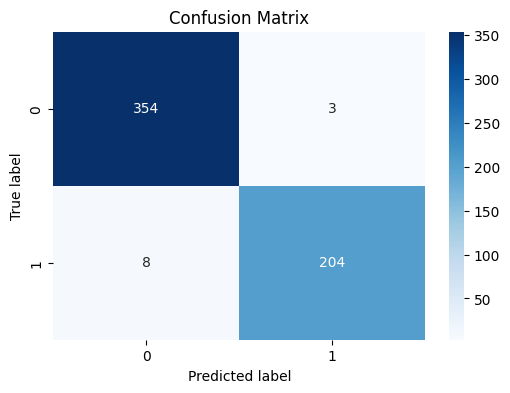

In [26]:
# create a heatmap
plt.figure(figsize=(6,4))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')

# add labels and title
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

plt.show()

From the confusion matrix:

The top left is True Negatives, these are the instances were the model correctly predicted negative for cancer

The top right is is the False Positives, where the model incorrectly predicted a patient to have cancer

The bottom left is the False Negatives, the model incorrectly predicted the a patient to NOT have cancer

The bottom right is the True Positives, these are the cases where the model correctly predicted positive for cancer

#### Decision Tree

In [27]:
# create a decision tree classifier with max depth of 3, sqrt of the 9 features
model = DecisionTreeClassifier(max_depth=3, max_features='sqrt')

# perform cross-validation predictions
tree_predictions = cross_val_predict(model, x, y_encoded, cv=5)

# check the distribution of prediction results
predictions_series = pd.Series(tree_predictions)
print(predictions_series.value_counts())

0    364
1    205
dtype: int64


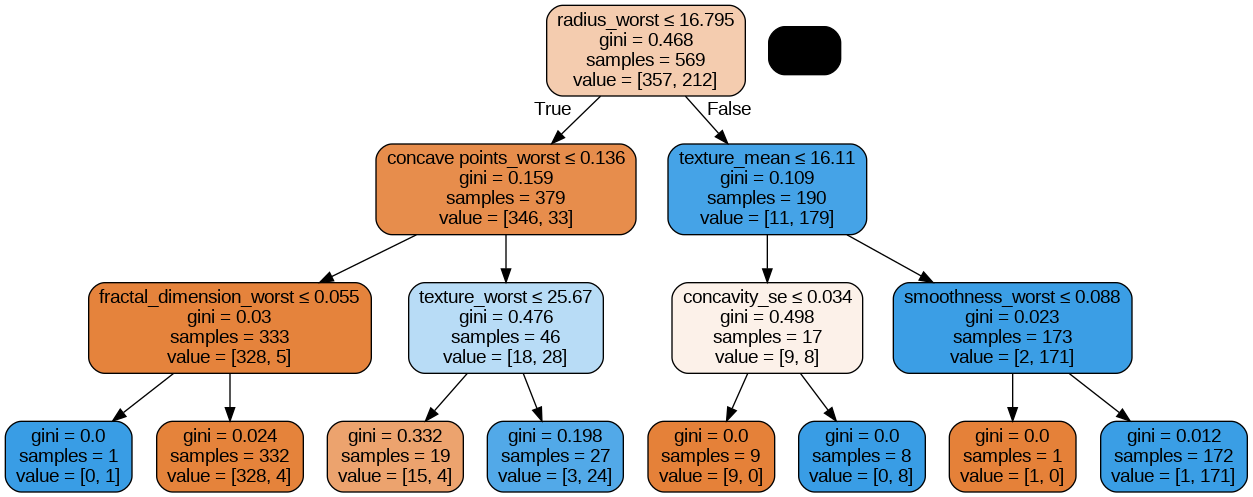

In [28]:
# visualize the tree
model = DecisionTreeClassifier(max_depth=3)
model.fit(x, y)
dot_data = export_graphviz(model, filled=True, rounded=True, special_characters=True, feature_names=x.columns)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

This Decision tree with a depth of 3 can be used to classify patients based on the values of features. We start at the root node, the radius_worst and work your way down to the leaf nodes based on the features.

Gini: measurement of misclassification, the lower the better, used to decide the best split at each node.

Samples: count of records that flow to each node

Value: classes in the samples, left negative, right is positive for malignant

In [29]:
# get the AUC score by comparing predictions to the actual test values
auc_score = roc_auc_score(y_encoded, tree_predictions)

print("AUC score:")
print(auc_score)

# create a confusion matrix
matrix = confusion_matrix(y_encoded, tree_predictions)
print("Confusion matrix:")
print(matrix)

AUC score:
0.9271048041858254
Confusion matrix:
[[342  15]
 [ 22 190]]


#### Random Forest

In [30]:
#random forest classifier
model = RandomForestClassifier()

# perform cross-validation predictions
forest_predictions = cross_val_predict(model, x, y_encoded, cv=5)

# get the AUC score by comparing predictions to the actual test values
auc_score = roc_auc_score(y_encoded, forest_predictions)

print("AUC score:")
print(auc_score)

AUC score:
0.9590930711907404


In [31]:
# create a confusion matrix
matrix = confusion_matrix(y_encoded, forest_predictions)
print("Confusion matrix:")
print(matrix)

Confusion matrix:
[[348   9]
 [ 12 200]]


In [32]:
# fit model again and get feature importance
model.fit(x, y_encoded)
importance = model.feature_importances_

# print importance next to the column names
importance_series = pd.Series(importance, index=x.columns)
print(importance_series.sort_values(ascending=False))

concave points_worst       0.139990
area_worst                 0.138691
radius_worst               0.121259
concave points_mean        0.108305
perimeter_worst            0.100527
concavity_mean             0.059256
area_mean                  0.056067
radius_mean                0.040150
concavity_worst            0.024539
area_se                    0.023668
perimeter_mean             0.023396
texture_mean               0.019964
compactness_worst          0.018786
texture_worst              0.016096
radius_se                  0.013744
smoothness_worst           0.013603
compactness_mean           0.010076
perimeter_se               0.009695
symmetry_worst             0.008714
smoothness_mean            0.008625
concavity_se               0.006127
fractal_dimension_worst    0.005974
symmetry_se                0.005341
compactness_se             0.004801
symmetry_mean              0.004599
fractal_dimension_mean     0.004241
smoothness_se              0.003954
texture_se                 0

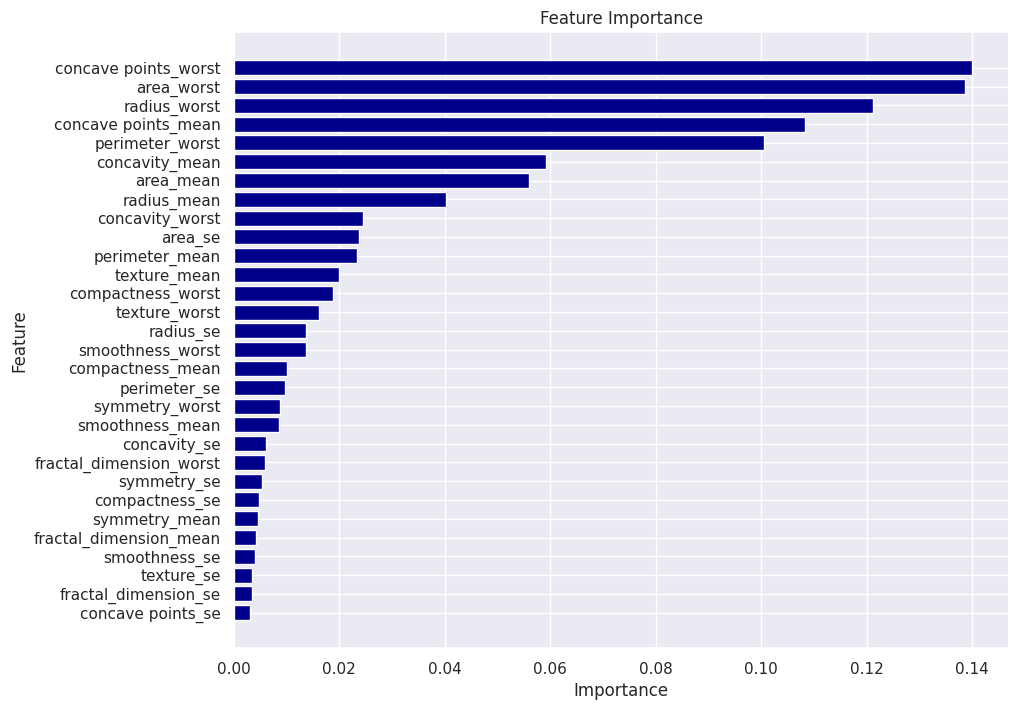

In [33]:
# sort feature importances in descending order
sorted_importances = importance_series.sort_values(ascending=False)

# create a bar plot
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10,8))
plt.barh(sorted_importances.index, sorted_importances.values, color='darkblue')

# invert y-axis so that features with highest importance are at the top
plt.gca().invert_yaxis()

# add labels and title
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()

Here we can see how important each feature is in determining the outcome of the predictions

#### K-Nearest Neighbors

In [34]:
# create a KNN classifier
model = KNeighborsClassifier()

# perform cross-validation predictions
knn_predictions = cross_val_predict(model, X_scaled, y_encoded, cv=5)

# get the AUC score by comparing predictions to the actual test values
auc_score = roc_auc_score(y_encoded, knn_predictions)

print("AUC score:")
print(auc_score)

matrix = confusion_matrix(y_encoded, knn_predictions)
print("Confusion matrix:")
print(matrix)

AUC score:
0.9585777707309339
Confusion matrix:
[[351   6]
 [ 14 198]]


In [35]:
# check how many neighbors our model used to make its predictions
model.fit(X_scaled, y_encoded)
print(f"neighbors: {model.n_neighbors}")

neighbors: 5


That means our model used the 5 training records that were closest to it in euclidean distance. This is where scaling the data before hand is important. Now lets see how our accuracy changes as we range through the different possible k values.

In [36]:
# List for the AUC scores for each value of k
auc_scores = []

# Range from 1 to 10 for the number of neighbors
k_values = np.arange(1, 11)

# For each k, train a KNN model and get the AUC score
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    knn_predictions = cross_val_predict(model, X_scaled, y_encoded, cv=5)
    auc = roc_auc_score(y_encoded, knn_predictions)
    auc_scores.append(auc)

print("AUC scores for different values of k:")
print(auc_scores)

AUC scores for different values of k:
[0.9464153585962686, 0.939637175624967, 0.950101738808731, 0.9533454891390518, 0.9585777707309339, 0.959463030495217, 0.9623368215210613, 0.9537881190211934, 0.959463030495217, 0.9547460493631414]


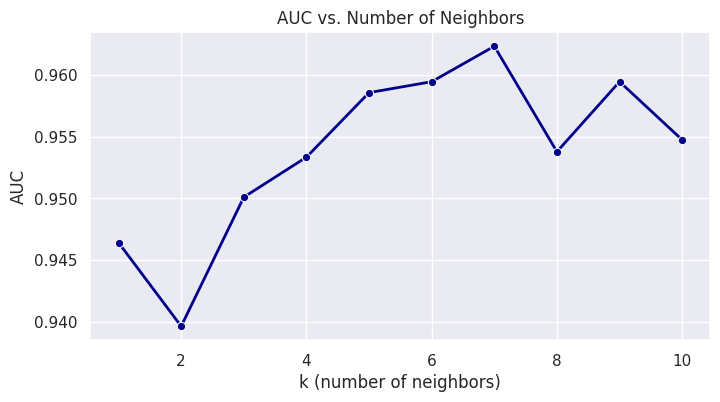

In [37]:
# plot auc scores
plt.figure(figsize=(8,4))
sns.set_theme(style='darkgrid')  # use seaborn's darkgrid theme
sns.lineplot(x=k_values, y=auc_scores, marker='o', linewidth=2, color='darkblue')
plt.xlabel('k (number of neighbors)')
plt.ylabel('AUC')
plt.title('AUC vs. Number of Neighbors')
plt.grid(True)
plt.show()

#### XGBoost

In [38]:
# create XGBoost classifier
model = xgb.XGBClassifier()

# perform cross-validation predictions
xgb_predictions = cross_val_predict(model, X_scaled, y_encoded, cv=5)

# calculate AUC score
auc_score = roc_auc_score(y_encoded, xgb_predictions)
print("AUC score:", auc_score)

# get confusion matrix
matrix = confusion_matrix(y_encoded, xgb_predictions)
print("Confusion matrix:")
print(matrix)

AUC score: 0.9666111727709952
Confusion matrix:
[[350   7]
 [ 10 202]]


XGBoost, an ensemble method, builds multiple models and aggregates them into a single model. Specifically, it uses gradient boosting, to builds trees sequentially, with each new tree attempting to correct the errors made by the the last ones. It uses a gradient descent algorithm to minimize the loss when adding the new model.

Unlike traditional gradient boosting, XGBoost includes a regularization term in the loss function to penalize complex models. This helps in preventing overfitting, which is a common problem with decision tree based methods.


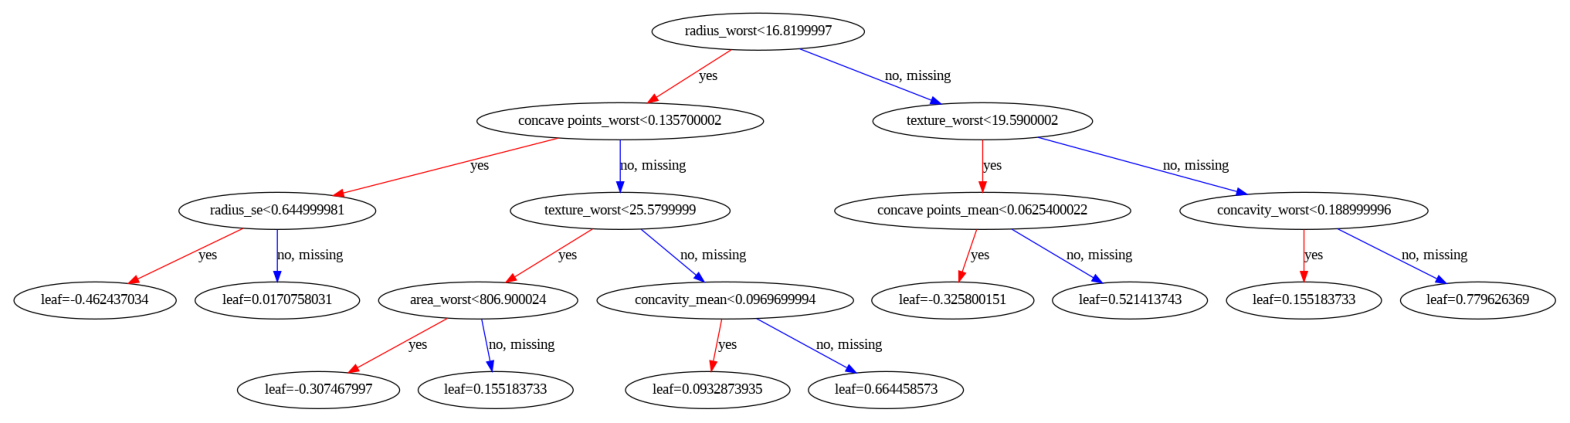

In [39]:
# get the first tree from the booster
model.fit(x, y_encoded)
booster = model.get_booster()
tree = booster.get_dump()[0]

# plot the tree
fig, ax = plt.subplots(figsize=(20, 20))
xgb.plot_tree(booster, num_trees=0, ax=ax)
plt.show()

The tree shown above is a graphical representation of just one tree from many in an ensemble model created by the XGBoost. Each tree contributes to the final prediction.

Each node here is a decision point and is labeled with a condition based on a feature. For example, radius_se <= 0.644999981 means that the decision at that node is made based on whether the radius_se feature is less than or equal to 0.644999981.

The branches from each node are the possible outcomes of the decision: red for yes and blue for no.

The leaves of the tree (the terminal nodes) show the output value of the decision tree for a given path. This value is a score that contributes to the final prediction of the ensemble model. For example, leaf=-0.462437034 shows the score assigned to the instances that end up in that leaf after all decisions have been made.

The paths from root to leaf represent rules that can be extracted from the model. These rules can be used to make a prediction for a new data point by following the decisions from the top of the tree down to a leaf.

#### Hyperparameter tuning with GridsearchCV

In [40]:
from xgboost import XGBClassifier

# loop through same models & hyperparameters
models = [
    ('Logistic Regression', LogisticRegression(random_state=42), {
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'penalty': ['l1', 'l2'],
    }),
    ('Decision Tree', DecisionTreeClassifier(random_state=42), {
        'max_depth': [None, 5, 10, 15, 20],
    }),
    ('Random Forest', RandomForestClassifier(random_state=42), {
        'n_estimators': [10, 50, 100, 200],
        'max_depth': [None, 5, 10, 15, 20],
    }),
    ('KNN', KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7, 9, 11],
    }),
    ('XGBoost', XGBClassifier(random_state=42), {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
    })
]

# store the best models and their scores
best_models = {}
best_scores = {}
best_params = {}

In [41]:
# use 5 fold cross validation and then test on each model
# store the best estimator, score, and hyperparameters for each model
best_models = {}
best_scores = {}
best_params = {}
for name, model, params in models:
    # set grid as the GridSearchCV object with 5 fold cross validation
    grid = GridSearchCV(model, params, cv=5, scoring='roc_auc')
    # fit the grid search to the data
    grid.fit(X_scaled, y_encoded)
    # store the best model found during the grid search
    best_models[name] = grid.best_estimator_
    # store the highest ROC-AUC score obtained
    best_scores[name] = grid.best_score_
    # store the best combination of parameters found
    best_params[name] = grid.best_params_

In [42]:
# print the best scores and the best parameters for each model on the balanced dataset
for name in best_models:
    print(f"{name}: Best Score = {best_scores[name]}")
    print(f"Best Parameters = {best_params[name]}\n")

Logistic Regression: Best Score = 0.9953183788345923
Best Parameters = {'C': 1, 'penalty': 'l2'}

Decision Tree: Best Score = 0.9160488014217952
Best Parameters = {'max_depth': 5}

Random Forest: Best Score = 0.9923131380877861
Best Parameters = {'max_depth': 5, 'n_estimators': 200}

KNN: Best Score = 0.9915244264900341
Best Parameters = {'n_neighbors': 5}

XGBoost: Best Score = 0.9942771616780789
Best Parameters = {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}



The best model here, with the highest roc_auc score is the logistic regression with 'C': 1 and 'penalty': 'l2'.

When the model is being trained, it tries to find the right importance to give to each feature. Without the penalty, some features can end up having too much influence, which can lead to wrong predictions, especially on new data it hasn't seen before.

C controls the regularizations of penalizing large coefficients and preventing overfitting. Smaller values mean stronger regularization so C: 1 means that the model has found a balance where the regularization is strong enough to prevent overfitting without being so strong that it creates bias.

Penalty specifies the type used in the penalization. The l2 penalty is the standard used in logistic regression. It is basically a tax on the model's coefficients (the importance it assigns to each feature). The more a feature's coefficient grows, the more tax it has to pay. This tax is calculated by squaring the size of the coefficients, adding them all up, and then applying the penalty.

## Feature selection

Feature selection is a very important step in model building because it impacts the performance and interpretability of the model. Selection helps us reduce overfitting, improve accuracy, and reduce training time. Removing highly correlated features helps us minimize redundancy and can improve the models performance and stability.

For this part we will select features using different methods such as: feature selection using correlation, univariate feature selection, recursive feature elimination (RFE), recursive feature elimination with cross validation (RFECV) and tree based feature selection. We will use our random forest model to test results.

#### Feature selection using correlation

For the first feature selection method, let's test out manually selecting features that are not correlated with others. So based on the correlation map heat graph from earlier, we can see that radius_mean, perimeter_mean and area_mean are perfectly correlated with each other, so why don't we use only area_mean then and remove those 2 fields.  So lets find other correlated features, remove "unnecesary" ones, and test it again through our decision tree.

- Compactness_mean, concavity_mean and concave points_mean are correlated with each other. So let's go with concavity_mean.
- Radius_se, perimeter_se and area_se are correlated so lets use area_se.
radius_worst, perimeter_worst and area_worst are correlated so lets go with area_worst.
- Compactness_worst, concavity_worst and concave points_worst so concavity_worst.
- Compactness_se, concavity_se and concave points_se so concavity_se.
- Texture_mean and texture_worst so use texture_mean. area_worst and area_mean are correlated so use area_mean.

In [44]:
# list of fields to drop, new x as x_1
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x_1 = x.drop(drop_list1,axis = 1 )
x_1.head() # new field now only has 16 fields instead of 30

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


<Axes: >

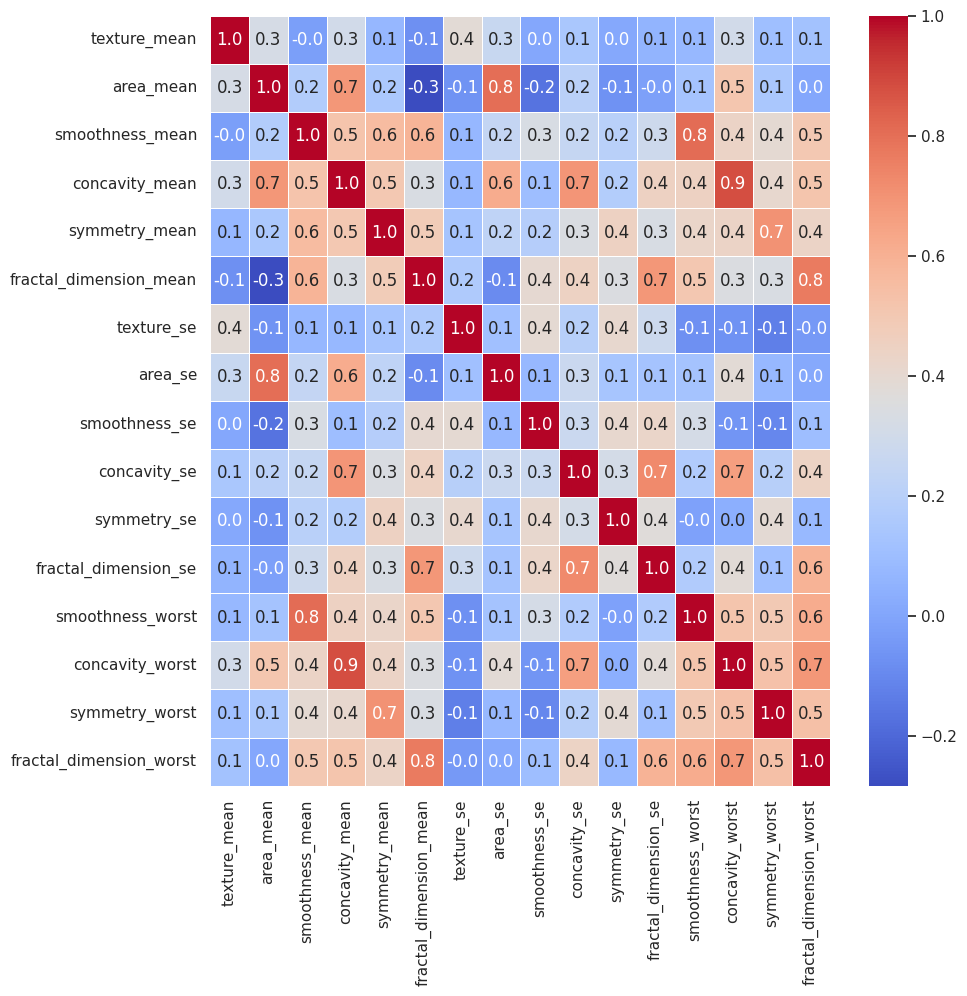

In [47]:
# new correlation map
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap='coolwarm')

In [63]:
# now lets use use our random forest model to test the new features

# create a random forest classifier with max depth of 3, sqrt of the 9 features
model = RandomForestClassifier()

# perform cross-validation predictions
forest_predictions = cross_val_predict(model, x_1, y_encoded, cv=5)

# get the AUC score by comparing predictions to the actual test values
auc_score = roc_auc_score(y_encoded, forest_predictions)

print("AUC score:")
print(auc_score) # AUC of 95.6%, performed very similiar to without feature selection

# create a confusion matrix
matrix = confusion_matrix(y_encoded, forest_predictions)
print("Confusion matrix:")
print(matrix)

AUC score:
0.9562192801648961
Confusion matrix:
[[351   6]
 [ 15 197]]


#### Univariate feature selection


Univariate feature selection simplifies features by keeping only the most 'informative' features. This is based on statistical tests that measure their association with the label variable, selecting those with the highest scores.

Using the SelectKBest method from scikit-learn, we select the top 'k' features based on their statistical significance. Here, let's start with k=10 to see the identify the 10 most relevant features.

In [60]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# find best scored 10 features
select_feature = SelectKBest(chi2, k=10).fit(x, y_encoded)

# get the mask of selected features
selected_features_mask = select_feature.get_support()

# get the scores for all features and filter for the selected ones
selected_features_scores = select_feature.scores_[selected_features_mask]

# get the names of the selected features
selected_features_names = x.columns[selected_features_mask]

print(selected_features_names)
print(selected_features_scores)

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'perimeter_se', 'area_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst'],
      dtype='object')
[2.66104917e+02 9.38975081e+01 2.01110286e+03 5.39916559e+04
 2.50571896e+02 8.75850471e+03 4.91689157e+02 1.74449400e+02
 3.66503542e+03 1.12598432e+05]


In [61]:
x_2 = x[selected_features_names]
x_2.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,perimeter_se,area_se,radius_worst,texture_worst,perimeter_worst,area_worst
0,17.99,10.38,122.80,1001.0,8.589,153.40,25.38,17.33,184.60,2019.0
1,20.57,17.77,132.90,1326.0,3.398,74.08,24.99,23.41,158.80,1956.0
2,19.69,21.25,130.00,1203.0,4.585,94.03,23.57,25.53,152.50,1709.0
3,11.42,20.38,77.58,386.1,3.445,27.23,14.91,26.50,98.87,567.7
4,20.29,14.34,135.10,1297.0,5.438,94.44,22.54,16.67,152.20,1575.0


In [65]:
model = RandomForestClassifier()

# perform cross-validation predictions
forest_predictions = cross_val_predict(model, x_2, y_encoded, cv=5)

# get the AUC score by comparing predictions to the actual test values
auc_score = roc_auc_score(y_encoded, forest_predictions)

print("AUC score:")
print(auc_score) # AUC of 92%, performed worse than without feature selection

# create a confusion matrix
matrix = confusion_matrix(y_encoded, forest_predictions)
print("Confusion matrix:")
print(matrix)

AUC score:
0.9350655356482216
Confusion matrix:
[[346  11]
 [ 21 191]]


#### Recursive feature elimination (RFE)

Recursive Feature Elimination (RFE) ranks features by their importance, as determined by the random forest's feature weights, and iteratively removes the least important ones. This process continues until the specified number of features is reached, ensuring that only the most relevant features are retained for model training.

In a random forest, feature importance is determined based on how much each feature decreases the impurity of the split (for example, using Gini impurity or entropy in classification tasks). Features that lead to the largest decreases in impurity across all trees in the forest are considered the most important.

In [69]:
# setup RFE with the base model and specify the number of features
model = RandomForestClassifier()
rfe = RFE(estimator=model, n_features_to_select=10)

# fit RFE
rfe.fit(x, y_encoded)

# transform the dataset to only include the selected features
x_3 = rfe.transform(x)

x_3[:1]

array([[1.799e+01, 1.228e+02, 3.001e-01, 1.471e-01, 1.534e+02, 2.538e+01,
        1.733e+01, 1.846e+02, 2.019e+03, 2.654e-01]])

In [71]:
feature_names = x.columns
selected_features_mask = rfe.support_

# get the names of the selected features
selected_feature_names = feature_names[selected_features_mask]

print("Selected features:", selected_feature_names)

Selected features: Index(['radius_mean', 'perimeter_mean', 'concavity_mean',
       'concave points_mean', 'area_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'concave points_worst'],
      dtype='object')


In [70]:
# perform cross-validation predictions with the RFE-selected features
model = RandomForestClassifier()
forest_predictions = cross_val_predict(model, x_3, y_encoded, cv=5)

# get the AUC score by comparing predictions to the actual test values
auc_score = roc_auc_score(y_encoded, forest_predictions)

print("AUC score:")
print(auc_score) # 95.8% auc, about the same as no feature selection

# Create a confusion matrix
matrix = confusion_matrix(y_encoded, forest_predictions)
print("Confusion matrix:")
print(matrix)

AUC score:
0.9581351408487924
Confusion matrix:
[[349   8]
 [ 13 199]]


#### Recursive feature elimination with cross validation

Recursive Feature Elimination with Cross-Validation (RFECV) combined with Random Forest not only identifies the most important features for making predictions but also the optimal number of features needed to achieve the highest model accuracy.

RFECV determines the optimal number of features by iteratively removing the least important features, based on model performance metrics obtained through cross-validation. At each iteration, it check the model's accuracy with the current subset of features, selecting the number of features that results in the highest cross-validated score as the optimal choice.

In [72]:
# create an RFECV object
# step=1 means that one feature is removed at each iteration, check auc score
model = RandomForestClassifier()
rfecv = RFECV(estimator=model, step=1, cv=5,scoring='roc_auc')

# fit RFECV to the data to find the optimal number of features and which features are most important
rfecv = rfecv.fit(x, y_encoded)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x.columns[rfecv.support_])

Optimal number of features : 14
Best features : Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'concavity_mean', 'concave points_mean', 'area_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')


In [75]:
# transform x to include only the optimal features selected by RFECV
x_optimal = x.iloc[:, rfecv.support_]
x_optimal.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,area_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,concavity_worst,concave points_worst
0,17.99,10.38,122.80,1001.0,0.3001,0.14710,153.40,25.38,17.33,184.60,2019.0,0.1622,0.7119,0.2654
1,20.57,17.77,132.90,1326.0,0.0869,0.07017,74.08,24.99,23.41,158.80,1956.0,0.1238,0.2416,0.1860
2,19.69,21.25,130.00,1203.0,0.1974,0.12790,94.03,23.57,25.53,152.50,1709.0,0.1444,0.4504,0.2430
3,11.42,20.38,77.58,386.1,0.2414,0.10520,27.23,14.91,26.50,98.87,567.7,0.2098,0.6869,0.2575
4,20.29,14.34,135.10,1297.0,0.1980,0.10430,94.44,22.54,16.67,152.20,1575.0,0.1374,0.4000,0.1625


In [76]:
# test on new 14 fields
model = RandomForestClassifier()
forest_predictions = cross_val_predict(model, x_optimal, y_encoded, cv=5)

auc_score = roc_auc_score(y_encoded, forest_predictions)

print("AUC score:")
print(auc_score)  # 96%, our highest score yet

# Create a confusion matrix
matrix = confusion_matrix(y_encoded, forest_predictions)
print("Confusion matrix:")
print(matrix)

AUC score:
0.96049363141483
Confusion matrix:
[[349   8]
 [ 12 200]]


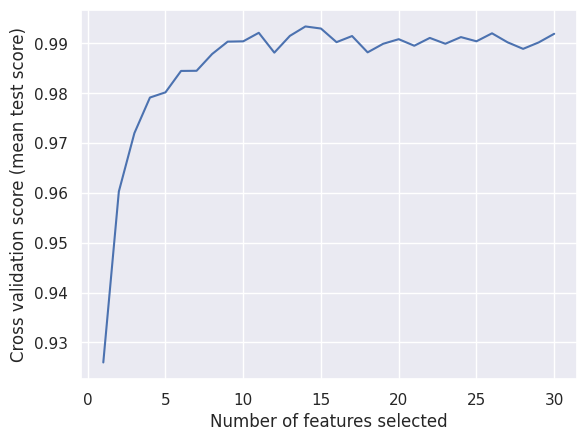

In [74]:
# plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (mean test score)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

#### Feature extraction with PCA

Principal Component Analysis (PCA) is a technique used for feature extraction by reducing the dimensionality of data while retaining as much variance as possible. PCA transforms the original features into a new set of features, called principal components (PCs), which are uncorrelated and ordered such that the first few retain most of the variation present in the original dataset.

The number of principal components selected can be specified depending on the desired amount of variance we aim to capture. Before PCA, we to standardize the data to so each feature contributes equally to the analysis, as PCA is sensitive to the scale of the features.

Text(0, 0.5, 'explained_variance_ratio_')

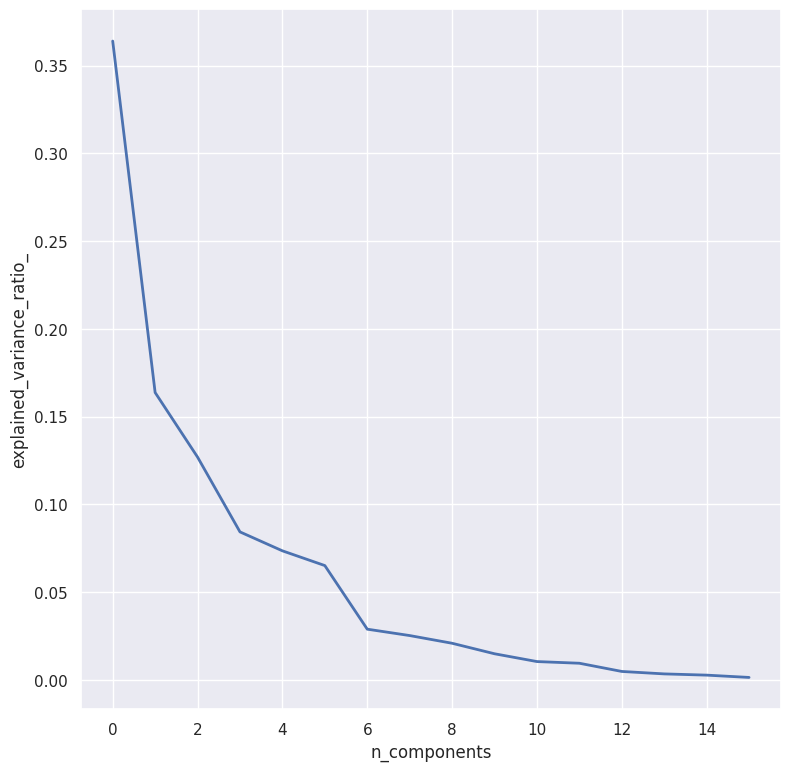

In [80]:
# call PCA and fit the scaled features into it
pca = PCA()
pca.fit(X_scaled)

# plot pca to see variance amount by features
plt.figure(1, figsize=(10, 10))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

In [81]:
# lets just use 2 components as an example
n_components = 2
pca = PCA(n_components=n_components)

# fit PCA on the scaled data and transform the data
X_pca = pca.fit_transform(X_scaled)

model = RandomForestClassifier()
forest_predictions = cross_val_predict(model, X_pca, y_encoded, cv=5)

auc_score = roc_auc_score(y_encoded, forest_predictions)
print("AUC score:", auc_score) # 92% from just 2 fields

matrix = confusion_matrix(y_encoded, forest_predictions)
print("Confusion matrix:")
print(matrix)

AUC score: 0.9252616140795941
Confusion matrix:
[[339  18]
 [ 21 191]]


Achieving a 92% AUC ROC score with just 2 PCA-derived features shows the power of PCA and dimensionality reduction in focusing on the underlying patterns that contribute most significantly to predictive accuracy.

## Conclusion

This project shows the importance of EDA and data pre-processing in understanding the dataset and preparing it for machine learning models. Various models were tested, including Logistic Regression, Decision Tree, Random Forest, K-Nearest Neighbors, and XGBoost. Each model provided unique insights, but it was the simplest model, Logistic Regression, that performed the best with an AUC-ROC of 99.5%.

Hyperparameter tuning further optimized the performance of the models. However, it was the process of feature selection that truly highlighted the importance of understanding the different features. Techniques such as correlation-based feature selection, univariate feature selection, and recursive feature elimination with cross validation (RFECV) and Principal Component Analysis (PCA) were used to identify the most relevant features for the models. Using these feature selection methods with random forest models, the RFECV proceed the highest ROC AUC of 96%. It is notable that using PCA, in using only 2 features, was able to return an impressive AUC ROC of 93%.

Finally, the project demonstrates the significance of machine learning in healthcare, particularly in diagnosing critical conditions like breast cancer. While the Logistic Regression model performed exceptionally well in this case, the project also explores more complex models and feature selection techniques. This iterative process of testing and refining is what makes machine learning a powerful tool in the field of medical diagnosis and to help improve health outcomes for patients.